<a href="https://colab.research.google.com/github/Vishveshsg7/data_science/blob/main/assignment_4_DS.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [86]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [87]:
from os import read
db=pd.read_csv('HousingData.csv')

In [88]:
print(db)

        CRIM    ZN  INDUS  CHAS    NOX     RM   AGE     DIS  RAD  TAX  \
0    0.00632  18.0   2.31   0.0  0.538  6.575  65.2  4.0900    1  296   
1    0.02731   0.0   7.07   0.0  0.469  6.421  78.9  4.9671    2  242   
2    0.02729   0.0   7.07   0.0  0.469  7.185  61.1  4.9671    2  242   
3    0.03237   0.0   2.18   0.0  0.458  6.998  45.8  6.0622    3  222   
4    0.06905   0.0   2.18   0.0  0.458  7.147  54.2  6.0622    3  222   
..       ...   ...    ...   ...    ...    ...   ...     ...  ...  ...   
501  0.06263   0.0  11.93   0.0  0.573  6.593  69.1  2.4786    1  273   
502  0.04527   0.0  11.93   0.0  0.573  6.120  76.7  2.2875    1  273   
503  0.06076   0.0  11.93   0.0  0.573  6.976  91.0  2.1675    1  273   
504  0.10959   0.0  11.93   0.0  0.573  6.794  89.3  2.3889    1  273   
505  0.04741   0.0  11.93   0.0  0.573  6.030   NaN  2.5050    1  273   

     PTRATIO       B  LSTAT  MEDV  
0       15.3  396.90   4.98  24.0  
1       17.8  396.90   9.14  21.6  
2       17.8  3

{'whiskers': [<matplotlib.lines.Line2D at 0x7b9998e99a50>,
 'caps': [<matplotlib.lines.Line2D at 0x7b9998e9b460>,
 'boxes': [<matplotlib.lines.Line2D at 0x7b9998e9a2c0>,
 'medians': [<matplotlib.lines.Line2D at 0x7b9998e9b940>,
 'fliers': [<matplotlib.lines.Line2D at 0x7b9998e9b6a0>,
 'means': []}

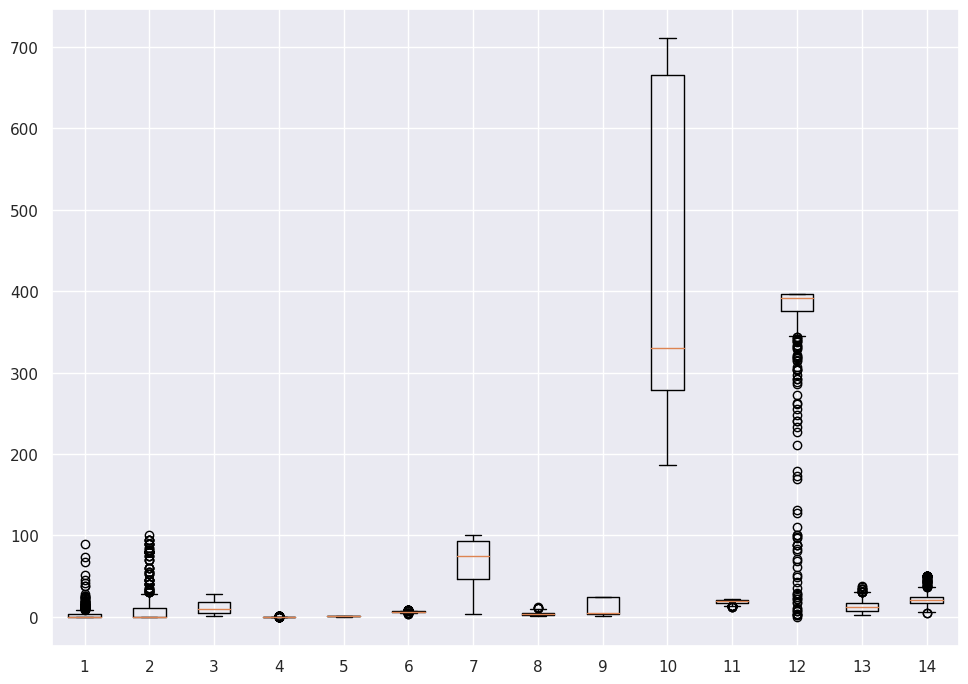

In [119]:
plt.boxplot(db)

In [128]:
Q1 = db.quantile(0.25)
Q3 = db.quantile(0.75)

# Calculate the interquartile range (IQR) for each feature
IQR = Q3 - Q1

# Define the lower and upper bounds to identify outliers for each feature
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Filter out rows that have any feature values outside the bounds
cleaned_df = db[~((db < lower_bound) | (db > upper_bound)).any(axis=1)]

# If you want to remove outliers only from the target variable 'MEDV'
# Define the lower and upper bounds specifically for 'MEDV'
Q1_MEDV = db['MEDV'].quantile(0.25)
Q3_MEDV = db['MEDV'].quantile(0.75)
IQR_MEDV = Q3_MEDV - Q1_MEDV
lower_bound_MEDV = Q1_MEDV - 1.5 * IQR_MEDV
upper_bound_MEDV = Q3_MEDV + 1.5 * IQR_MEDV
db1 = db[(db['MEDV'] >= lower_bound_MEDV) & (db['MEDV'] <= upper_bound_MEDV)]
Q1_MEDV = db1['RM'].quantile(0.25)
Q3_MEDV = db1['RM'].quantile(0.75)
IQR_MEDV = Q3_MEDV - Q1_MEDV
lower_bound_MEDV = Q1_MEDV - 1.5 * IQR_MEDV
upper_bound_MEDV = Q3_MEDV + 1.5 * IQR_MEDV
db2 = db1[(db1['RM'] >= lower_bound_MEDV) & (db1['RM'] <= upper_bound_MEDV)]
Q1_MEDV = db2['LSTAT'].quantile(0.25)
Q3_MEDV = db2['LSTAT'].quantile(0.75)
IQR_MEDV = Q3_MEDV - Q1_MEDV
lower_bound_MEDV = Q1_MEDV - 1.5 * IQR_MEDV
upper_bound_MEDV = Q3_MEDV + 1.5 * IQR_MEDV
db3 = db2[(db2['LSTAT'] >= lower_bound_MEDV) & (db2['LSTAT'] <= upper_bound_MEDV)]

{'whiskers': [<matplotlib.lines.Line2D at 0x7b9997e755a0>,
 'caps': [<matplotlib.lines.Line2D at 0x7b9997e75ae0>,
 'boxes': [<matplotlib.lines.Line2D at 0x7b9997e75300>,
 'medians': [<matplotlib.lines.Line2D at 0x7b9997e76020>,
 'fliers': [<matplotlib.lines.Line2D at 0x7b9997e762c0>,
 'means': []}

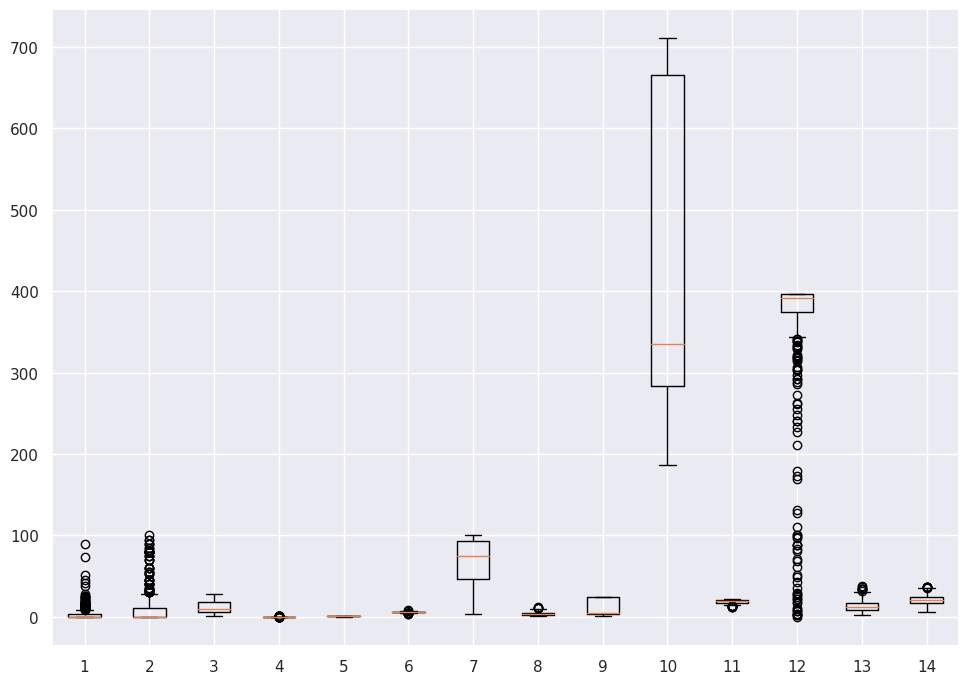

In [129]:
plt.boxplot(db1)

In [130]:
db.isnull().sum()

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
MEDV       0
dtype: int64

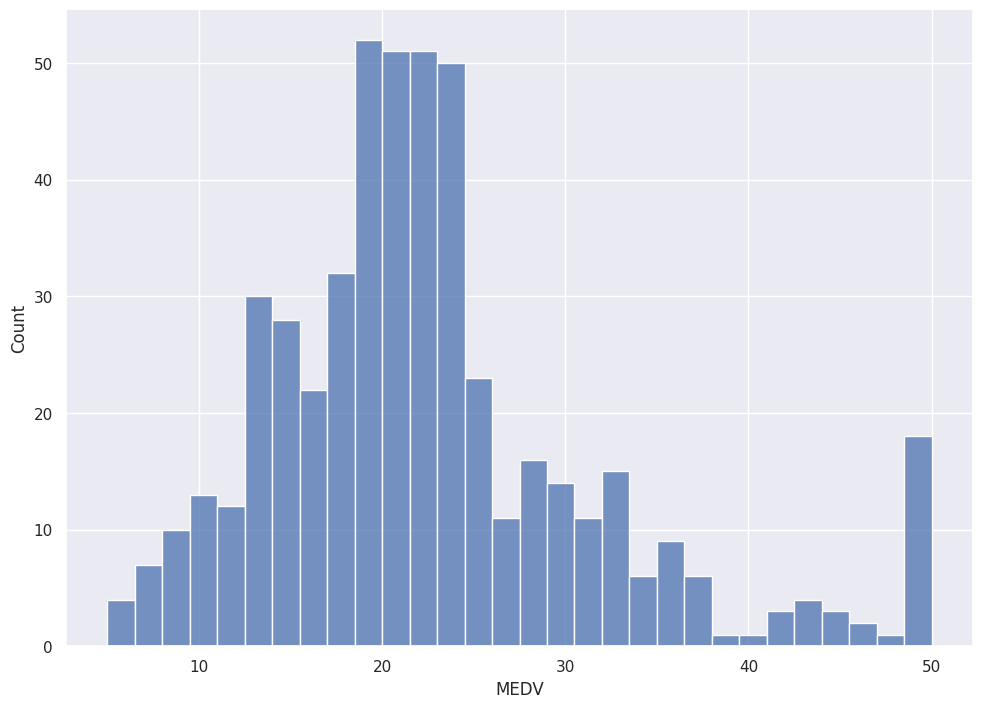

In [131]:
sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.histplot(db['MEDV'], bins=30)
plt.show()

<Axes: >

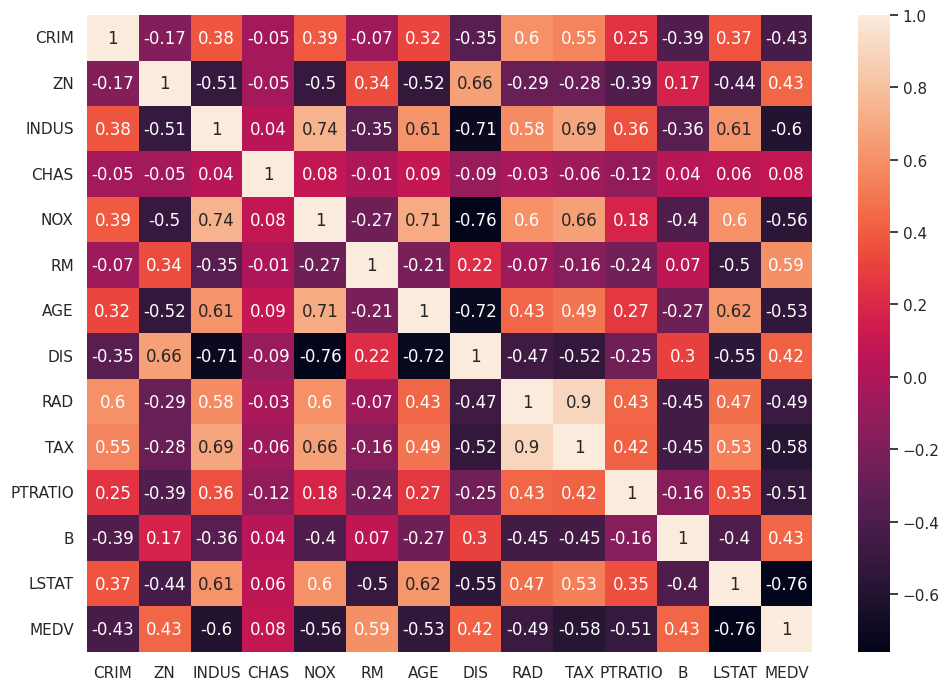

In [133]:
correlation_matrix = db3.corr().round(2)
sns.heatmap(data=correlation_matrix, annot=True)

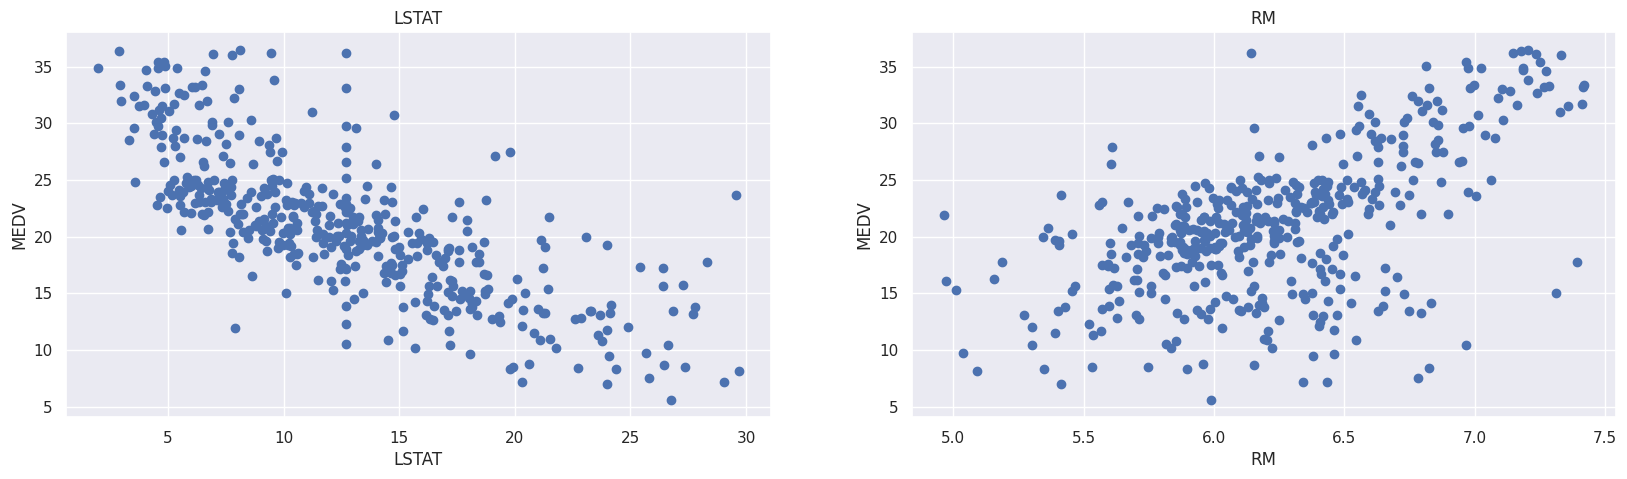

In [134]:
plt.figure(figsize=(20,5))
features = ['LSTAT', 'RM']
target=db3['MEDV']

for i, col in enumerate(features):
  plt.subplot(1, len(features), i+1)
  x= db3[col]
  y=target
  plt.scatter(x, y,marker='o')
  plt.title(col)
  plt.xlabel(col)
  plt.ylabel('MEDV')

In [135]:
X = pd.DataFrame(np.c_[db3['LSTAT'], db3['RM']], columns= ['LSTAT','RM'])
Y = db3['MEDV']

In [136]:
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state=5)
print(X_train.shape)
print(X_test.shape)
print(Y_train.shape)
print(Y_test.shape)

(356, 2)
(89, 2)
(356,)
(89,)


In [137]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
lin_model = LinearRegression()
lin_model.fit(X_train, Y_train)

LinearRegression()

In [138]:
y_train_predict = lin_model.predict(X_train)
rmse = (np.sqrt(mean_squared_error(Y_train, y_train_predict)))
r2 = r2_score(Y_train, y_train_predict)
pred = lin_model.predict([[6.34,7.123]])
print("Predicted value (LR): ",pred)
#print("Accuracy (LR): ",(lin_model.score(X[:1000], Y[:1000])*100))
print("The model performance for training set")
print("--------------------------------------")
print('RMSE is {}'.format(rmse))
print('R2 score is {}'.format(r2))
print("\n")

# model evaluation for testing set
y_test_predict = lin_model.predict(X_test)
rmse = (np.sqrt(mean_squared_error(Y_test, y_test_predict)))
r2 = r2_score(Y_test, y_test_predict)

print("The model performance for testing set")
print("--------------------------------------")
print('RMSE is {}'.format(rmse))
print('R2 score is {}'.format(r2))

Predicted value (LR):  [28.47806018]
The model performance for training set
--------------------------------------
RMSE is 3.6831314649222167
R2 score is 0.6499861451653685


The model performance for testing set
--------------------------------------
RMSE is 4.251247792200266
R2 score is 0.551751923488556


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
